Caesar cypher from fifth assignment

In [4]:
def encrypt(char: str, key: int) -> chr:
    if char.isalpha():
        base = 'A' if char.isupper() else 'a'
        return chr(((ord(char) - ord(base) + key) % 26) + ord(base))
    else:
        return chr((ord(char) + key) % 68)

def decrypt(char: str, key: int) -> chr:
    if char.isalpha():
        base = 'A' if char.isupper() else 'a'
        return chr(((ord(char) - ord(base) - key + 26) % 26) + ord(base))
    else:
        return chr((ord(char) - key) % 68)

def process_text(text: str, transformation, key: int) -> str:
    return ''.join(transformation(char, key) for char in text)

def main():
    while True:
        print("Choose the command\n\t0. Exit\n\t1. Encrypt text\n\t2. Decrypt text")
        choice: str = int(input(">> "))
        
        if choice == 0:
            break
        elif choice in (1, 2):
            fileNameToLoad: str = input("Enter the file name for loading: ")
            fileNameToSave: str = input("Enter the file name for saving: ")
            key: int = int(input("Enter the key: "))

            text: str = open(fileNameToLoad).read()
            if choice == 1:
                transformation = encrypt
            else:
                transformation = decrypt
            processed_text: str = process_text(text, transformation, key)
            open(fileNameToSave, 'w').write(processed_text)

            print(f"Processed text: {processed_text}")

if __name__ == '__main__':
    main()


Manual crypto analysis steps

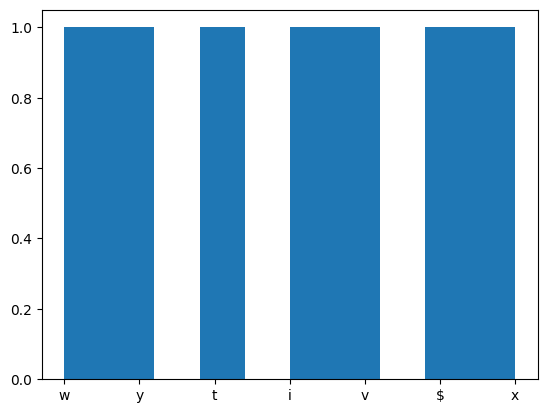

In [1]:
import matplotlib.pyplot as plt
def analyzeManually(encryptedText:str):
    letterFrequency = {}
    for char in encryptedText:
        if char not in letterFrequency:
            letterFrequency[char] = 1
        else:
            letterFrequency[char] += 1

    plt.hist(letterFrequency)

text: str = open('encrypted.txt').read()
analyzeManually(text)

Frequency histogram of the letter frequency in the encrypted text

In [22]:
from main import decrypt

def calculateFrequency(encryptedText:str):
    letterFrequency = {}
    for char in encryptedText:
        if char.isalpha():
            char = char.lower()
            if char not in letterFrequency:
                letterFrequency[char] = 1
            else:
                letterFrequency[char] += 1
    result = {}
    for key, value in letterFrequency.items():
        result[key] = (value / len(letterFrequency)) * 100
    return result

def calculateDifference(freq1, freq2):
    overallDifference = 0
    alphabet: str = 'abcdefghijklmnopqrstuvwxyz'
    
    for letter in alphabet:
        freq1Value = freq1.get(letter, 0)
        freq2Value = freq2.get(letter, 0)
        charDifference = abs(freq1Value - freq2Value)
        overallDifference += charDifference
    
    difference = overallDifference / len(alphabet)
    return difference
    
def analyzeManually(encryptedText:str):
    letterFrequency = calculateFrequency(encryptedText)
    shift = ord(max(letterFrequency, key=letterFrequency.get)) - ord('e')
    print('Decrypted text: ', ''.join(decrypt(char, shift) for char in encryptedText))
    
def crackAutomatically(encryptedText:str):
    oxfordFrequency = {
        'a': 8.4966, 'b': 2.0720, 'c': 4.5388, 'd': 3.3844, 'e': 11.1607,
        'f': 1.8121, 'g': 2.4705, 'h': 3.0034, 'i': 7.5448, 'j': 0.1965,
        'k': 1.1016, 'l': 5.4893, 'm': 3.0129, 'n': 6.6544, 'o': 7.1635,
        'p': 3.1671, 'q': 0.1962, 'r': 7.5809, 's': 5.7351, 't': 6.9509,
        'u': 3.6308, 'v': 1.0074, 'w': 1.2899, 'x': 0.2902, 'y': 1.7779, 'z': 0.2722
    }

    differences = []
    for shift in range(26):
        decryptedText = ''.join(decrypt(char, shift) for char in encryptedText)
        encryptedFrequency = calculateFrequency(decryptedText)
        difference = calculateDifference(encryptedFrequency, oxfordFrequency)
        differences.append((shift, difference))
    differences.sort(key = lambda obj: obj[1])
    print(f"Possible variants:\n{process_text(encryptedText, decrypt, differences[0][0])}\n")
    print(process_text(encryptedText, decrypt, differences[1][0]), '\n')
    print(process_text(encryptedText, decrypt, differences[2][0]))

def main():
    text: str = open('bigDecrypt.txt').read()
    analyzeManually(text)
    crackAutomatically(text)

if __name__ == '__main__':
    main()

Decrypted text:  Create a reference frequencies table by using any suitable source (this one, for instance). In order
to crack the cipher, you have to check how "close" the decrypted text is to the English language.
To do so, you need to brute-force the encryption key (26 possible keys) and for each key calculate
the difference between the frequency of each letter in the decrypted text and the reference table
letter. 
Possible variants:
Create a reference frequencies table by using any suitable source (this one, for instance). In order
to crack the cipher, you have to check how "close" the decrypted text is to the English language.
To do so, you need to brute-force the encryption key (26 possible keys) and for each key calculate
the difference between the frequency of each letter in the decrypted text and the reference table
letter. 

NcpleplcpqpcpynpqcpbfpyntpdelmwpmjfdtyrlyjdftelmwpdzfcnpestdzypqzctydelynpTyzcopc?eznclnvespntaspcjzfslgpeznspnvszhnwzdpe